# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/26s_harbour/homeworks/lab001_ml_pipeline/car_data.csv
# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/26s_harbour/homeworks/lab001_ml_pipeline/column_names.json

In [2]:
import json
with open("column_names.json", "r") as fin:
    column_names = json.load(fin)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('car_data.csv', delimiter=',', index_col=0)
dataset.columns = column_names
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS LABEL
0,,,,,,,,,,,,,,,,,,,
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus


In [4]:

full_dataset_numpy = dataset.values

# dataset is numeric
data = full_dataset_numpy[:, :-1].astype(np.float32)
target = full_dataset_numpy[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(845, 18) (845,)
(549, 18) (549,) (296, 18) (296,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)
X_train_pd.columns = column_names[:-1]
# First 15 rows of our dataset.
X_train_pd.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
0,102.0,55.0,101.0,213.0,67.0,12.0,222.0,30.0,25.0,177.0,226.0,719.0,213.0,71.0,2.0,21.0,187.0,199.0
1,101.0,51.0,105.0,212.0,68.0,10.0,209.0,32.0,24.0,162.0,222.0,653.0,224.0,73.0,5.0,23.0,186.0,195.0
2,89.0,35.0,70.0,138.0,58.0,7.0,126.0,53.0,17.0,128.0,147.0,237.0,112.0,64.0,4.0,19.0,199.0,207.0
3,93.0,39.0,78.0,164.0,66.0,8.0,139.0,48.0,18.0,140.0,157.0,290.0,126.0,64.0,4.0,7.0,201.0,208.0
4,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
5,97.0,55.0,103.0,197.0,63.0,11.0,215.0,31.0,24.0,172.0,219.0,677.0,219.0,75.0,5.0,24.0,185.0,194.0
6,107.0,56.0,104.0,231.0,71.0,11.0,219.0,31.0,25.0,172.0,226.0,705.0,217.0,71.0,19.0,11.0,189.0,196.0
7,87.0,38.0,71.0,123.0,53.0,8.0,137.0,49.0,18.0,127.0,158.0,277.0,145.0,75.0,0.0,9.0,181.0,186.0
8,84.0,43.0,76.0,180.0,75.0,7.0,155.0,43.0,19.0,143.0,180.0,359.0,173.0,77.0,5.0,12.0,185.0,190.0
9,100.0,46.0,81.0,187.0,61.0,9.0,166.0,40.0,20.0,154.0,189.0,415.0,175.0,63.0,13.0,9.0,198.0,207.0


Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.668488,44.806923,82.029144,167.907104,61.320583,8.449909,168.719482,40.994537,20.581057,147.939896,188.404373,439.639343,174.309647,72.546448,6.220401,12.551912,188.768677,195.324219
std,8.189773,6.206827,16.086306,33.346016,7.488870,4.331996,33.551483,7.882461,2.610214,14.599709,31.488737,178.488846,32.872330,7.207567,4.892705,8.847219,6.094994,7.408849
min,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,56.000000,7.000000,145.000000,33.000000,19.000000,137.000000,166.000000,314.000000,149.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,146.000000,178.000000,361.000000,173.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,597.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,117.000000,58.000000,112.000000,322.000000,133.000000,55.000000,260.000000,61.000000,28.000000,182.000000,288.000000,982.000000,268.000000,127.000000,21.000000,41.000000,204.000000,211.000000


In [7]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COMPACTNESS                       549 non-null    float32
 1   CIRCULARITY                       549 non-null    float32
 2   DISTANCE CIRCULARITY              549 non-null    float32
 3   RADIUS RATIO                      549 non-null    float32
 4   PRAXIS ASPECT RATIO               549 non-null    float32
 5   MAXLENGTH ASPECT RATIO            549 non-null    float32
 6   SCATTER RATIO                     549 non-null    float32
 7   ELONGATEDNESS                     549 non-null    float32
 8   PRAXIS RECTANGULARITY             549 non-null    float32
 9   MAXLENGTH RECTANGULARITY          549 non-null    float32
 10  SCALED VARIANCE ALONG MAJOR AXIS  549 non-null    float32
 11  SCALED VARIANCE ALONG MINOR AXIS  549 non-null    float32
 12  SCALED R

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have some features range from 0 to 10, while others range into the hundreds.
This transformation centers the data distribution around a mean of 0 and a standard deviation of 1.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/

The best: {'C': 10, 'penalty': 'l1'}
Accuracy: 0.7635
F1 Score: 0.7591


/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 1000x800 with 0 Axes>

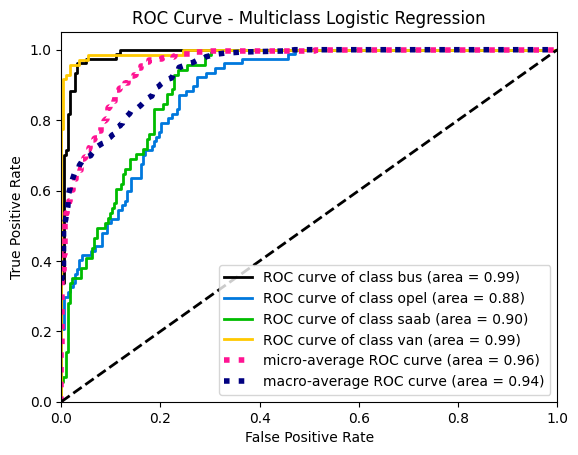

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

print(f"The best: {grid_search.best_params_}")

y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled) 

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted') 

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_proba)
plt.title('ROC Curve - Multiclass Logistic Regression')
plt.show()

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

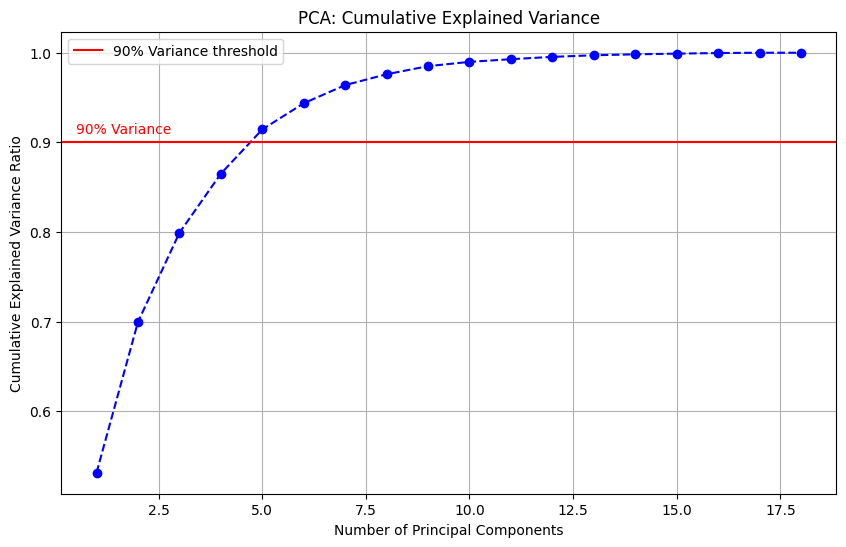

Explained variance ratio by component: [5.3154236e-01 1.6806920e-01 9.9471547e-02 6.5957017e-02 4.9382336e-02
 2.9210508e-02 2.0246072e-02 1.2109302e-02 9.0293158e-03 4.7918251e-03
 2.9848616e-03 2.5792720e-03 1.7843813e-03 1.0361646e-03 8.0068060e-04
 6.6735398e-04 3.1937842e-04 1.8323821e-05]


In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')

plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variance threshold')
plt.text(0.5, 0.91, '90% Variance', color = 'red', fontsize=10)

plt.title('PCA: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

print("Explained variance ratio by component:", pca.explained_variance_ratio_)

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [12]:
pca_final = PCA(n_components=5)
pca_final.fit(X_train_scaled)

X_train_pca = pca_final.transform(X_train_scaled)
X_test_pca = pca_final.transform(X_test_scaled)

print(f"Original shape: {X_train_scaled.shape}")
print(f"Transformed shape: {X_train_pca.shape}")
print(f"Total explained variance: {np.sum(pca_final.explained_variance_ratio_):.4f}")

Original shape: (549, 18)
Transformed shape: (549, 5)
Total explained variance: 0.9144


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

The best: {'C': 0.01, 'penalty': 'l2'}
Accuracy: 0.4932
F1 Score: 0.4800


/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/

<Figure size 1000x800 with 0 Axes>

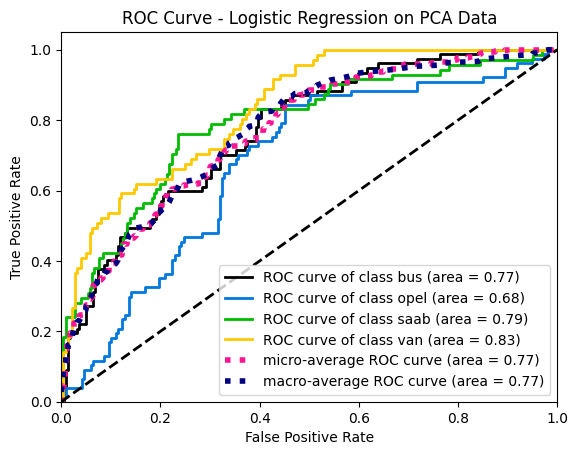

In [13]:
log_reg_pca = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    tol=1e-3,
    max_iter=500,
    random_state=42
)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_pca = GridSearchCV(log_reg_pca, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train)

best_model_pca = grid_search_pca.best_estimator_

print(f"The best: {grid_search_pca.best_params_}")

y_pred_pca = best_model_pca.predict(X_test_pca)
y_proba_pca = best_model_pca.predict_proba(X_test_pca)

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

print(f"Accuracy: {accuracy_pca:.4f}")
print(f"F1 Score: {f1_pca:.4f}")

plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_proba_pca)
plt.title('ROC Curve - Logistic Regression on PCA Data')
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best max_depth found: 9
Accuracy: 0.6351
F1 Score: 0.6352


<Figure size 1000x800 with 0 Axes>

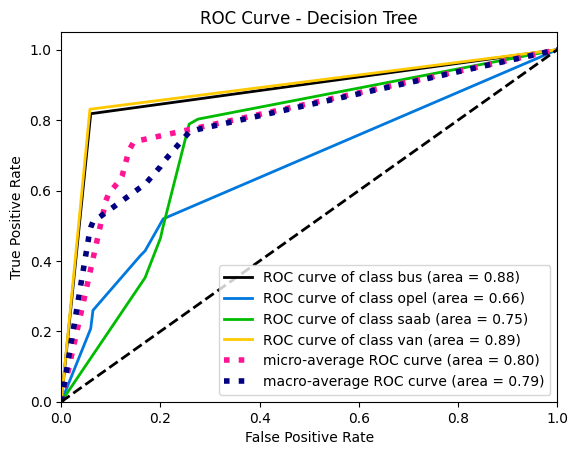

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': range(1, 21)
}

grid_search_tree = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train_scaled, y_train)

best_tree = grid_search_tree.best_estimator_

print(f"Best max_depth found: {grid_search_tree.best_params_['max_depth']}")

y_pred_tree = best_tree.predict(X_test_scaled)
y_proba_tree = best_tree.predict_proba(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")

plt.figure(figsize=(10, 8))
skplt.metrics.plot_roc(y_test, y_proba_tree)
plt.title('ROC Curve - Decision Tree')
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/

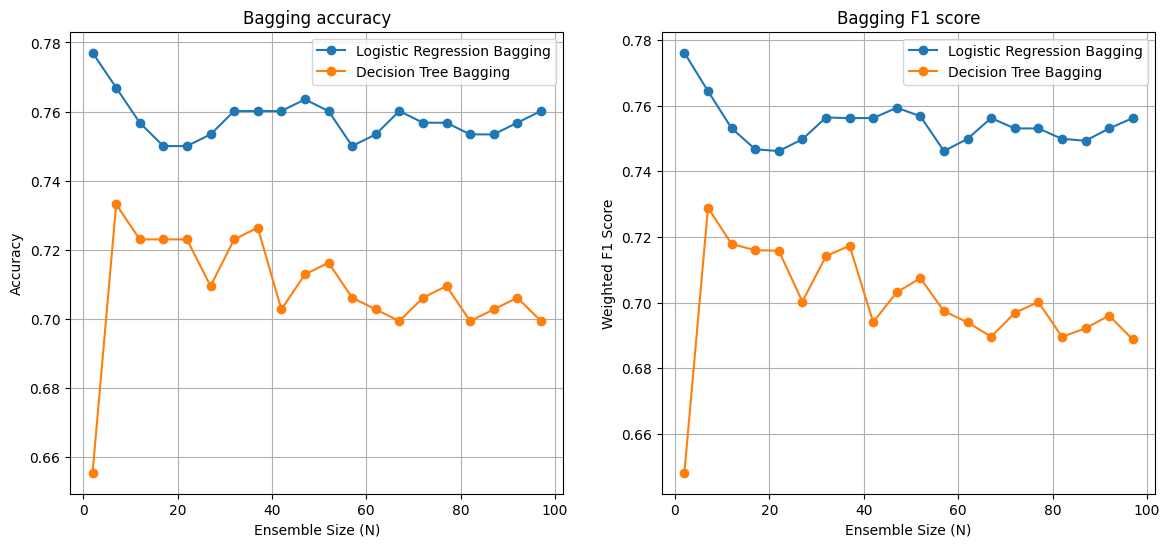

In [15]:
from sklearn.utils import resample

ensemble_sizes = range(2, 101, 5)
N_max = 100

logreg_acc, logreg_f1 = [], []
tree_acc, tree_f1 = [], []

best_params_logreg = {'C': 1, 'penalty': 'l1', 'solver': 'saga', 'multi_class': 'multinomial', 'tol': 1e-3, 'max_iter': 500}
best_params_tree = {'max_depth': 12} 

pool_logreg = []
pool_tree = []

for i in range(N_max):
    X_boot, y_boot = resample(X_train_scaled, y_train, random_state=i)
    
    lr = LogisticRegression(**best_params_logreg, random_state=i)
    lr.fit(X_boot, y_boot)
    pool_logreg.append(lr)
    
    dt = DecisionTreeClassifier(**best_params_tree, random_state=i)
    dt.fit(X_boot, y_boot)
    pool_tree.append(dt)

all_preds_logreg = np.array([model.predict(X_test_scaled) for model in pool_logreg])
all_preds_tree = np.array([model.predict(X_test_scaled) for model in pool_tree])

def get_ensemble_prediction(predictions_slice):
    final_preds = []
    for sample_preds in predictions_slice.T:
        values, counts = np.unique(sample_preds, return_counts=True)
        final_preds.append(values[np.argmax(counts)])
    return np.array(final_preds)

for n in ensemble_sizes:
    preds_lr_slice = all_preds_logreg[:n]
    y_pred_lr_ensemble = get_ensemble_prediction(preds_lr_slice)
    
    logreg_acc.append(accuracy_score(y_test, y_pred_lr_ensemble))
    logreg_f1.append(f1_score(y_test, y_pred_lr_ensemble, average='weighted'))
    
    preds_tree_slice = all_preds_tree[:n]
    y_pred_tree_ensemble = get_ensemble_prediction(preds_tree_slice)
    
    tree_acc.append(accuracy_score(y_test, y_pred_tree_ensemble))
    tree_f1.append(f1_score(y_test, y_pred_tree_ensemble, average='weighted'))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, logreg_acc, label='Logistic Regression Bagging', marker='o')
plt.plot(ensemble_sizes, tree_acc, label='Decision Tree Bagging', marker='o')
plt.xlabel('Ensemble Size (N)')
plt.ylabel('Accuracy')
plt.title('Bagging accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, logreg_f1, label='Logistic Regression Bagging', marker='o')
plt.plot(ensemble_sizes, tree_f1, label='Decision Tree Bagging', marker='o')
plt.xlabel('Ensemble Size (N)')
plt.ylabel('Weighted F1 Score')
plt.title('Bagging F1 score')
plt.grid(True)
plt.legend()

plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

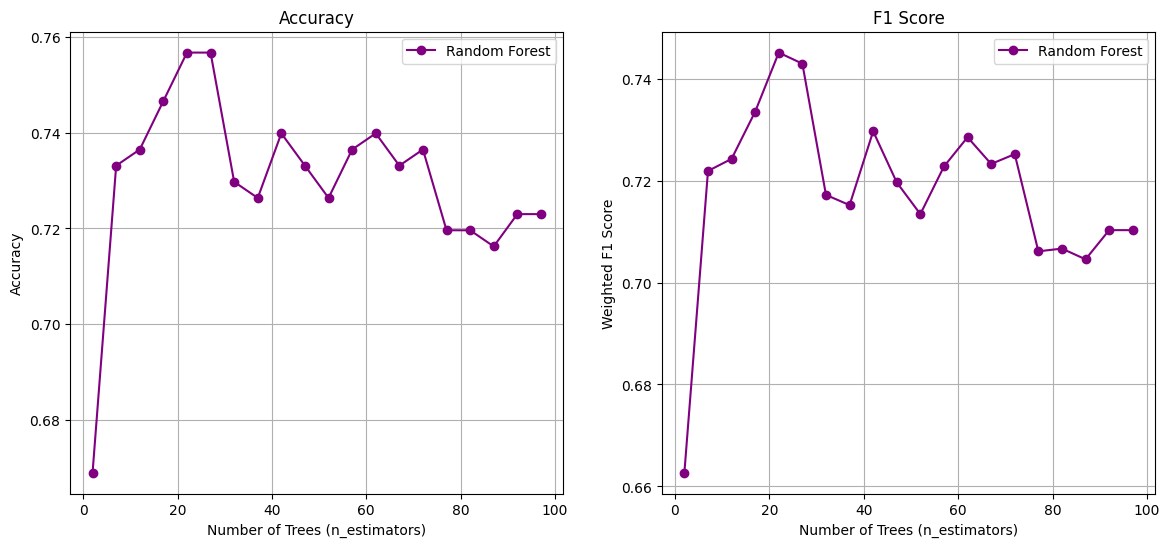

Max Accuracy: 0.7568 achieved with 22 trees.


In [16]:
from sklearn.ensemble import RandomForestClassifier

n_trees_range = range(2, 101, 5)

rf_acc, rf_f1 = [], []

for n in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train_scaled, y_train)
    
    y_pred = rf.predict(X_test_scaled)
    
    rf_acc.append(accuracy_score(y_test, y_pred))
    rf_f1.append(f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_trees_range, rf_acc, marker='o', color='purple', label='Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_trees_range, rf_f1, marker='o', color='purple', label='Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Weighted F1 Score')
plt.title('F1 Score')
plt.grid(True)
plt.legend()

plt.show()

max_acc = max(rf_acc)
optimal_n = n_trees_range[rf_acc.index(max_acc)]
print(f"Max Accuracy: {max_acc:.4f} achieved with {optimal_n} trees.")

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

Computing learning curves...


/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/ivanzukov/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/

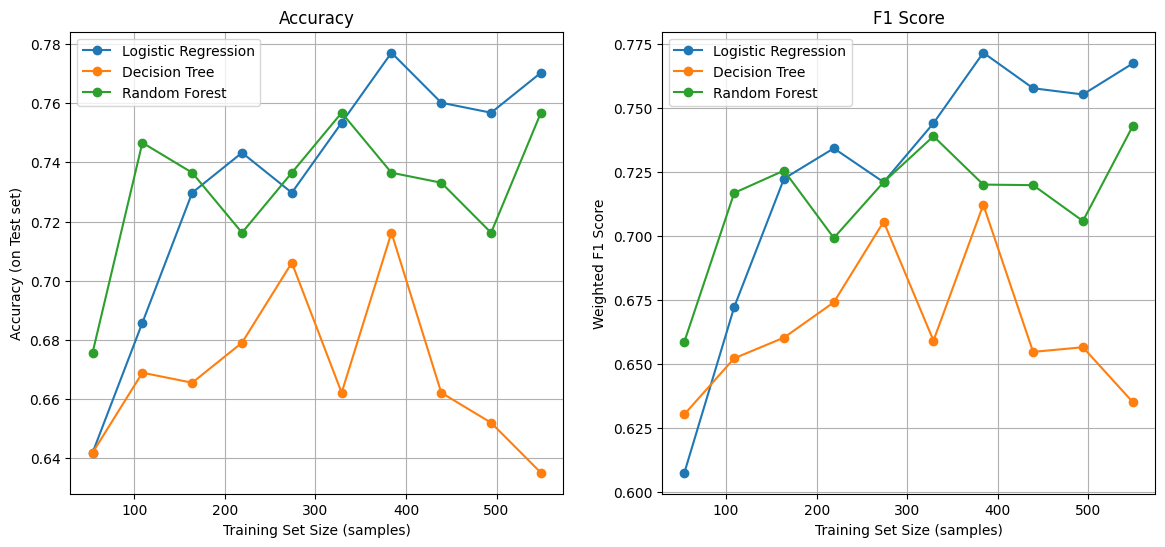

In [30]:
best_lr_params = {'C': 1, 'penalty': 'l1', 'solver': 'saga', 'multi_class': 'multinomial', 'tol': 1e-3, 'max_iter': 500}
best_dt_depth = 9 
best_rf_estimators = 27 

chunk_indices = np.linspace(0, X_train_scaled.shape[0], 11, dtype=int)[1:]

train_sizes = []
lr_scores = {'acc': [], 'f1': []}
dt_scores = {'acc': [], 'f1': []}
rf_scores = {'acc': [], 'f1': []}

print("Computing learning curves...")

for limit in chunk_indices:
    X_sub = X_train_scaled[:limit]
    y_sub = y_train[:limit]
    
    train_sizes.append(len(y_sub))
    
    lr = LogisticRegression(**best_lr_params, random_state=42)
    lr.fit(X_sub, y_sub)
    y_pred = lr.predict(X_test_scaled)
    lr_scores['acc'].append(accuracy_score(y_test, y_pred))
    lr_scores['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    
    dt = DecisionTreeClassifier(max_depth=best_dt_depth, random_state=42)
    dt.fit(X_sub, y_sub)
    y_pred = dt.predict(X_test_scaled)
    dt_scores['acc'].append(accuracy_score(y_test, y_pred))
    dt_scores['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    
    rf = RandomForestClassifier(n_estimators=best_rf_estimators, random_state=42, n_jobs=-1)
    rf.fit(X_sub, y_sub)
    y_pred = rf.predict(X_test_scaled)
    rf_scores['acc'].append(accuracy_score(y_test, y_pred))
    rf_scores['f1'].append(f1_score(y_test, y_pred, average='weighted'))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_sizes, lr_scores['acc'], 'o-', label='Logistic Regression')
plt.plot(train_sizes, dt_scores['acc'], 'o-', label='Decision Tree')
plt.plot(train_sizes, rf_scores['acc'], 'o-', label='Random Forest')
plt.xlabel('Training Set Size (samples)')
plt.ylabel('Accuracy (on Test set)')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes, lr_scores['f1'], 'o-', label='Logistic Regression')
plt.plot(train_sizes, dt_scores['f1'], 'o-', label='Decision Tree')
plt.plot(train_sizes, rf_scores['f1'], 'o-', label='Random Forest')
plt.xlabel('Training Set Size (samples)')
plt.ylabel('Weighted F1 Score')
plt.title('F1 Score')
plt.grid(True)
plt.legend()

plt.show()

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

Optimal number of trees found: 111
Accuracy: 0.7601
F1 Score: 0.7540


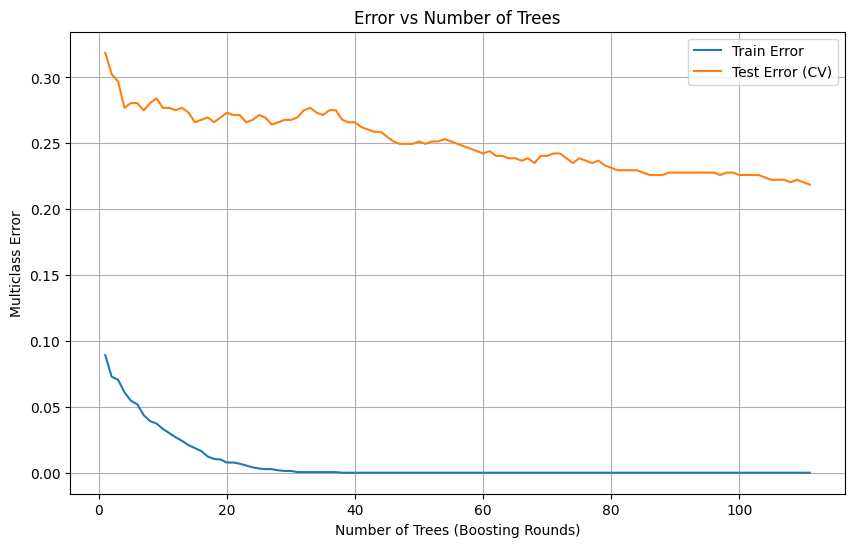

In [33]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

dtrain = xgb.DMatrix(X_train_scaled, label=y_train_enc)
dtest = xgb.DMatrix(X_test_scaled, label=y_test_enc)

params = {
    'objective': 'multi:softmax', 
    'num_class': 4,                
    'eta': 0.1,                    
    'max_depth': 6,                
    'eval_metric': 'merror',       
    'seed': 42
}

cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=500,       
    nfold=5,                   
    early_stopping_rounds=20,  
    seed=42,
    verbose_eval=False
)

optimal_trees = len(cv_results)
print(f"Optimal number of trees found: {optimal_trees}")

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=optimal_trees
)

y_pred_enc = bst.predict(dtest)

accuracy = accuracy_score(y_test_enc, y_pred_enc)
f1 = f1_score(y_test_enc, y_pred_enc, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, optimal_trees + 1), cv_results['train-merror-mean'], label='Train Error')
plt.plot(range(1, optimal_trees + 1), cv_results['test-merror-mean'], label='Test Error (CV)')
plt.xlabel('Number of Trees (Boosting Rounds)')
plt.ylabel('Multiclass Error')
plt.title('Error vs Number of Trees')
plt.legend()
plt.grid(True)
plt.show()